# Multinomial Naive Bayes Classifier- YouTube Dataset

In [1]:
import numpy as np
import pandas as pd
import glob #finds paths that match a specific pattern

## Reading the database

In [2]:
#reading database

files=glob.glob('youtube-dataset\*.csv') 
# * indicates that we want the names of all files that are in a csv format
files

['youtube-dataset\\Youtube01.csv',
 'youtube-dataset\\Youtube02.csv',
 'youtube-dataset\\Youtube03.csv',
 'youtube-dataset\\Youtube04.csv',
 'youtube-dataset\\Youtube05.csv']

In [3]:
#to train a classifier for the task of telling ham or spam, all we need are the messages and the class they belong to

all_df=[]

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'], axis=1))

In [4]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [5]:
#combining all samples froma all data files to one dataframe

data=pd.concat(all_df, axis=0, ignore_index=True) #axis=0; concat along the horizontal axis
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [6]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [7]:
#in order for Naive Base Classifier to perform optimally, the dataset needs to be balanced. which is the case here
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

## Sample 1

In [8]:
#we need to help python distinguish the difference between each word in the youtube comments
#a tool that we can use for this purpose is a class by sklearn called CountVectorizer
#CountVectorizer class tokenize strings and count the occurences of each word 

from sklearn.feature_extraction.text import CountVectorizer

message_sample=['This is a dog']
vectorizer_sample=CountVectorizer()
vectorizer_sample.fit(message_sample) #This method takes a document (or text) as an argument and creates a vocabulary dictionary of all tokens in the doc
#only words of at least two letters are tokenized
vectorizer_sample.transform(message_sample).toarray()

array([[1, 1, 1]], dtype=int64)

In [9]:
vectorizer_sample.get_feature_names_out()

array(['dog', 'is', 'this'], dtype=object)

In [10]:
vectorizer_sample.transform(['This is a cat']).toarray() #only counts 'is' and 'this' cuz not fitted

array([[0, 1, 1]], dtype=int64)

## Sample 2

In [11]:
message_sample2=['This is a dog and that is a dog', 'This is a cat']
vectorizer_sample2=CountVectorizer()
vectorizer_sample2.fit_transform(message_sample2).toarray()

array([[1, 0, 2, 2, 1, 1],
       [0, 1, 0, 1, 0, 1]], dtype=int64)

In [12]:
vectorizer_sample2.get_feature_names_out()

array(['and', 'cat', 'dog', 'is', 'that', 'this'], dtype=object)

In [13]:
vectorizer_sample2.transform(['Those are birds']).toarray()

array([[0, 0, 0, 0, 0, 0]], dtype=int64)

## Defining the inputs and the target. Creating train-test split

In [14]:
from sklearn.model_selection import train_test_split

inputs=data['CONTENT']
target=data['CLASS']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target, 
                                               test_size=0.2, 
                                               random_state=365,
                                               stratify=target)

In [16]:
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [17]:
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

## Tokenizing the YouTube comments

In [18]:
vectorizer=CountVectorizer()

In [19]:
x_train_transf=vectorizer.fit_transform(x_train)
x_test_transf=vectorizer.transform(x_test)

In [20]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
x_train_transf.shape

(1564, 3925)

In [22]:
x_test_transf.shape

(391, 3925)

## Performing the classification

In [23]:
from sklearn.naive_bayes import MultinomialNB

clf=MultinomialNB()

In [24]:
clf.fit(x_train_transf,y_train)

MultinomialNB()

In [25]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

## Performing the evaluation on the test dataset

In [26]:
y_test_pred=clf.predict(x_test_transf)

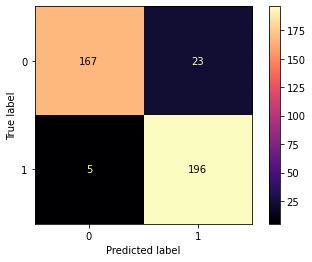

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,y_test_pred,
    labels=clf.classes_,
    cmap='magma'
)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred, target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.88      0.92       190
        Spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



In [30]:
#Accuracy=(TN+TP / All samples)
#Precision=(TP / TP+FP)
#Recall=(TP / TP+FN)

## Creating probability distribution figures

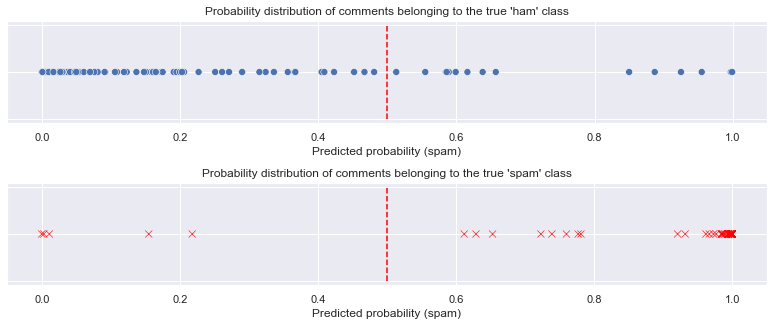

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

spam_proba=clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter= df_scatter.reset_index(drop=True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class']==0].reset_index(drop=True)
df_scatter_1 = df_scatter[df_scatter['True class']==1].reset_index(drop=True)

sns.set()

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,5))
fig.tight_layout(pad=3)

sns.scatterplot(x='Predicted probability (spam)',
               y=np.zeros(df_scatter_0.shape[0]),
               data=df_scatter_0,
               s=50,
               markers=['o'],
               palette=palette_0,
               style='True class',
               legend=False,
               ax=ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5,-1,1,linestyles='dashed',colors='red');

sns.scatterplot(x='Predicted probability (spam)',
               y=np.zeros(df_scatter_1.shape[0]),
               hue='True class',
               data=df_scatter_1,
               s=50,
               markers=['x'],
               palette=palette_1,
               style='True class',
               legend=False,
               ax=ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')
ax2.vlines(0.5,-1,1,linestyles='dashed',colors='red');